In [1]:
import pandas as pd
from pathlib import Path
import gdown

import matplotlib.pyplot as plt
import seaborn as sns

### Get Data

In [2]:
# PATH_TO_DATA = "C:\\Users\\Peteris\\Documents\\CV\\2025\\shiprojects\\hw_app\\data\\"
PATH_TO_DATA = "C:\\Users\\pich\\Documents\\CV\\2025\\shiprojects\\hw_app\\data\\"
file_name = "test-assignment-dataset.json"
data_url="https://drive.google.com/file/d/1Xx4ozrFDDmzDCuIyUTxjzj43eARpxW1o/view?usp=sharing"

In [3]:
def get_and_load_file(
        data_folder:str="../data/", filename=file_name,
        url:str=data_url)->pd.DataFrame:
    """
    Load JSON dataset into a DataFrame. 
    Download JSON dataset from a Google Drive URL, if not already present.
    :param data_folder: Path to the folder where the file should be stored or loaded from.
    :param filename: Name of the file to check, download, and load.
    :param url: Google Drive URL for downloading the file if it's not found locally.
    :return: A pandas DataFrame containing the data from the JSON file.
    """
    local_file_path = data_folder + filename
    if not Path(local_file_path).is_file():
        print(f"Source data file not present in {data_folder}, downloading file")
        gdown.download(url, local_file_path, fuzzy=True, quiet=False)  # quiet=True after testing
    df = pd.read_json(local_file_path)
    return df

df_source = get_and_load_file(data_folder=PATH_TO_DATA)  # change to default "../data/" after testing
df_source.sample(3)

Source data file not present in C:\Users\pich\Documents\CV\2025\shiprojects\hw_app\data\, downloading file


Downloading...
From (original): https://drive.google.com/uc?id=1Xx4ozrFDDmzDCuIyUTxjzj43eARpxW1o
From (redirected): https://drive.google.com/uc?id=1Xx4ozrFDDmzDCuIyUTxjzj43eARpxW1o&confirm=t&uuid=4a0e47a6-e807-4662-a944-1ab407e6b953
To: C:\Users\pich\Documents\CV\2025\shiprojects\hw_app\data\test-assignment-dataset.json
100%|██████████| 389M/389M [00:28<00:00, 13.7MB/s] 


,latitude,longitude,speedOverGround,draught,heading,courseOverGround,status,mainEngineMassFlowRate,mainEngineVolumeFlowRate,mainEngineDensity,...,windWavePeriod,windDirection,windSpeed,airTemperature,salinity,seaLevel,recommendedMassFlowRate,expectedSpeedOverGround,recommendedPower,expectedCarbonIntensityIndicator
260782,43.4450,-3.817920,0.0,5.6,275,345.3,5,0.000,0.000000,854.576,...,0.53,173.59,5.33,18.25,35.35,0.41,NaN,NaN,NaN,NaN
147723,37.8913,0.758795,10.5,5.8,54,58.7,0,198.879,0.231326,859.734,...,1.94,20.04,6.77,19.51,36.95,0.07,NaN,NaN,NaN,NaN
264416,43.4450,-3.817890,0.0,5.6,275,191.7,5,0.000,0.000000,855.270,...,0.53,173.59,5.33,18.25,35.35,0.41,NaN,NaN,NaN,NaN


### EDA

In [4]:
df_source.columns

Index(['latitude', 'longitude', 'speedOverGround', 'draught', 'heading',
       'courseOverGround', 'status', 'mainEngineMassFlowRate',
       'mainEngineVolumeFlowRate', 'mainEngineDensity',
       'mainEngineTemperature', 'mainEngineFuelConsumed',
       'auxEngineMassFlowRate', 'auxEngineVolumeFlowRate', 'auxEngineDensity',
       'auxEngineTemperature', 'shaftSpeed', 'shaftTorque', 'shaftPower',
       'specificFuelOilConsumption', 'timestamp', 'fuelEfficiency',
       'currentDirection', 'currentSpeed', 'gust', 'swellDirection',
       'swellHeight', 'swellPeriod', 'waveDirection', 'waveHeight',
       'wavePeriod', 'windWaveDirection', 'windWaveHeight', 'windWavePeriod',
       'windDirection', 'windSpeed', 'airTemperature', 'salinity', 'seaLevel',
       'recommendedMassFlowRate', 'expectedSpeedOverGround',
       'recommendedPower', 'expectedCarbonIntensityIndicator'],
      dtype='object')

In [5]:
print(df_source.shape)
df_source.info()

(326224, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326224 entries, 0 to 326223
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   latitude                          326222 non-null  float64            
 1   longitude                         326222 non-null  float64            
 2   speedOverGround                   326224 non-null  float64            
 3   draught                           326220 non-null  float64            
 4   heading                           326224 non-null  int64              
 5   courseOverGround                  326222 non-null  float64            
 6   status                            326224 non-null  int64              
 7   mainEngineMassFlowRate            326224 non-null  float64            
 8   mainEngineVolumeFlowRate          326224 non-null  float64            
 9   mainEngineDensity                 3

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df_source.describe()

,latitude,longitude,speedOverGround,draught,heading,courseOverGround,status,mainEngineMassFlowRate,mainEngineVolumeFlowRate,mainEngineDensity,mainEngineTemperature,mainEngineFuelConsumed,auxEngineMassFlowRate,auxEngineVolumeFlowRate,auxEngineDensity,auxEngineTemperature,shaftSpeed,shaftTorque,shaftPower,specificFuelOilConsumption,fuelEfficiency,currentDirection,currentSpeed,gust,swellDirection,swellHeight,swellPeriod,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,windSpeed,airTemperature,salinity,seaLevel,recommendedMassFlowRate,expectedSpeedOverGround,recommendedPower,expectedCarbonIntensityIndicator
count,326222.000000,326222.000000,326224.000000,326220.000000,326224.000000,326222.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,3.262240e+05,3.262240e+05,170130.000000,308207.000000,308207.000000,326224.000000,317216.000000,317084.000000,317084.000000,308135.000000,319809.000000,305432.000000,316981.000000,316956.000000,317216.000000,326224.000000,326224.000000,326224.000000,326224.000000,326224.000000,42376.000000,42376.000000,4.237600e+04,41735.000000
mean,49.632092,2.978693,4.950242,5.139615,193.701527,184.906974,2.346624,101.245179,0.117942,815.007951,24.161276,1.687420,6.928908,0.007913,831.910785,29.055252,91.172805,25018.630128,4.726122e+05,1.345341e+04,24.023266,175.602391,0.213010,9.238503,231.826153,0.832728,5.962773,200.727807,1.248696,4.953513,195.791109,0.622706,2.573644,191.147175,6.184837,13.429885,32.111769,0.139154,208.732514,10.394949,1.002439e+06,13.708862
std,7.842426,11.030812,5.310358,0.852991,94.737099,101.332097,2.450708,107.507566,0.125246,180.324604,6.350480,1.791793,5.631603,0.006469,89.815379,4.816925,90.952806,26582.660106,5.129609e+05,1.096295e+06,49.499521,97.980663,0.188869,5.095318,94.955289,1.083965,2.736090,89.367433,1.353802,2.578808,89.104112,0.856438,1.822063,90.703968,3.610953,7.193249,5.866357,0.890680,34.060448,1.817699,1.919168e+05,3.732638
min,35.889400,-23.062100,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,-102.695000,-36.085000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.480000,0.060000,0.010000,1.370000,0.130000,0.000000,1.270000,0.120000,0.000000,0.000000,0.000000,0.170000,-5.090000,8.500000,-3.650000,117.000000,2.714490,4.536688e+05,6.323664
25%,43.360600,-4.751288,0.000000,4.000000,119.000000,104.700000,0.000000,0.000000,0.000000,844.099000,19.763700,0.000000,0.000000,0.000000,833.019000,25.154087,0.230909,561.959000,1.137835e+01,0.000000e+00,16.982491,92.790000,0.090000,5.140000,168.610000,0.100000,3.970000,138.370000,0.390000,2.920000,133.280000,0.090000,1.450000,116.290000,3.350000,6.690000,30.380000,-0.280000,174.000000,9.030438,8.141896e+05,11.299184
50%,51.623500,3.744930,0.200000,5.600000,207.000000,191.400000,1.000000,0.223440,0.000000,859.116000,25.441300,0.003724,8.562600,0.009678,852.911500,29.616125,1.698130,1839.530000,2.460855e+02,1.509878e+02,19.791990,180.000000,0.150000,8.460000,263.920000,0.500000,5.690000,207.890000,0.810000,4.370000,203.150000,0.360000,2.230000,205.400000,5.330000,14.220000,34.920000,0.070000,200.000000,10.428973,9.676852e+05,12.926036
75%,54.436675,8.506670,10.600000,5.900000,271.000000,270.000000,5.000000,208.348250,0.242225,866.413000,27.714200,3.472471,10.602400,0.012155,863.605000,32.971000,182.396000,50966.000000,9.712270e+05,2.136662e+02,22.387983,259.750000,0.300000,12.870000,308.040000,1.060000,7.930000,276.440000,1.750000,5.990000,260.080000,0.790000,3.420000,255.000000,8.220000,19.260000,35.500000,0.550000,246.000000,11.423510,1.190503e+06,15.216035
max,66.328200,32.230000,17.300000,6.000000,359.000000,359.900000,5.000000,572.696000,0.680159,880.345000,149.950000,9.544933,28.019000,0.046928,875.904500,46.816250,185.733000,94223.400000,1.796530e+06,2.832681e+08,3176.

In [7]:
pd.reset_option('all')

C:\Users\pich\AppData\Local\Temp\ipykernel_8972\2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\pich\AppData\Local\Temp\ipykernel_8972\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


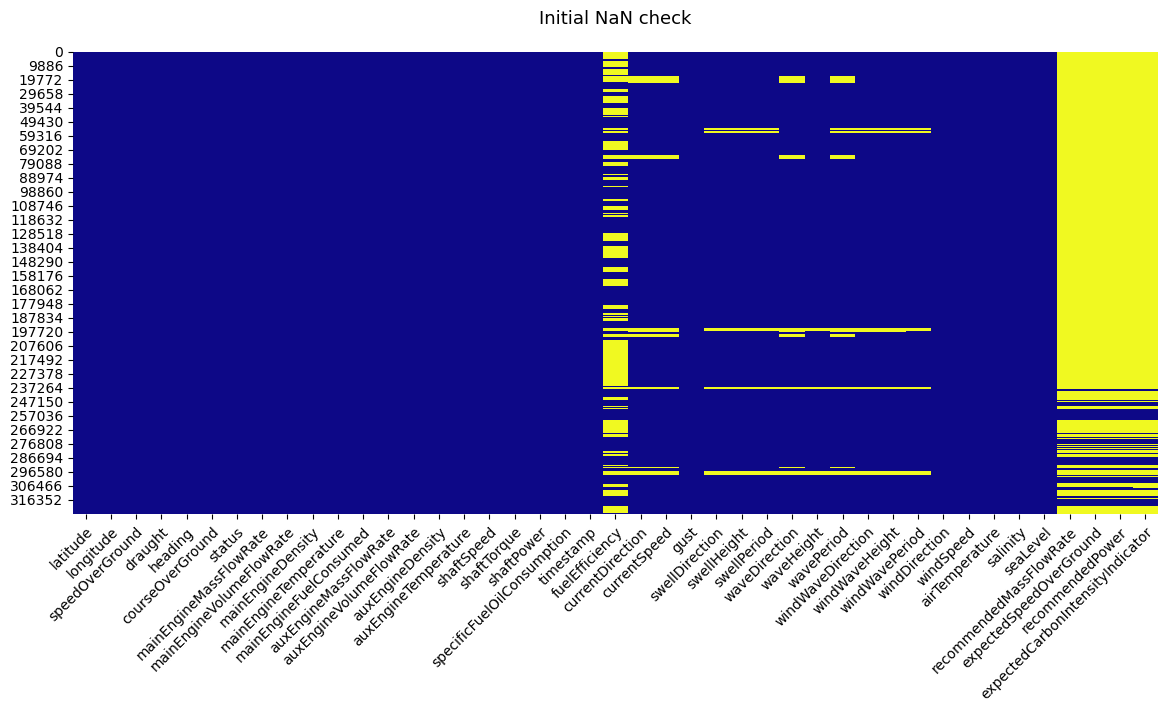

In [8]:
plt.figure(figsize=(df_source.shape[1] // 3, 6))
sns.heatmap(df_source.isnull(), cmap='plasma', cbar=False)
plt.title("Initial NaN check\n", 
          fontsize=13)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

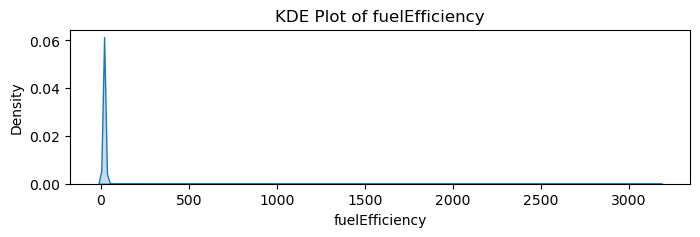

In [9]:
plt.figure(figsize=[8, 2])
sns.kdeplot(data=df_source['fuelEfficiency'].dropna(), fill=True)
plt.title('KDE Plot of fuelEfficiency')
plt.xlabel('fuelEfficiency')
plt.ylabel('Density')
plt.show()

In [10]:
df_source['fuelEfficiency'].value_counts(dropna=True, ascending=False, normalize=True).head(5)

fuelEfficiency
0.00     0.065826
20.55    0.000035
18.66    0.000029
19.74    0.000024
16.52    0.000024
Name: proportion, dtype: float64

In [11]:
nan_rows = df_source[df_source.loc[:, 'currentDirection':'seaLevel'].isnull().any(axis=1)].index  # rows, where specified columns contain NaNs
print(f"proportion of rows containing nan values in selected rows ('currentDirection':'seaLevel') \
against entire dataset:\n{round(len(nan_rows)/df_source.shape[0]*100, 1)}%")

proportion of rows containing nan values in selected rows ('currentDirection':'seaLevel') against entire dataset:
6.4%


- #### With only ~6% of rows containing missing values, I will delete them in training task:
    - To decide on best imputation strategy for missing environmental data (weather, sea conditions) domain expert is needed on:
        - whether mean/mode imputation is sufficient
        - Does dataset structure (eg row sequence, timestamp) has sufficient for k-neighbors imputation
        - does other columns are sufficient predictors to use regression imputation
- #### Drop 'recommendedMassFlowRate' and 'expectedCarbonIntensityIndicator' columns that are not target for current prediction task
- #### Replace 'fuelEfficiency' NaNs with zeroes as it is most popular value among "good" entries for the feature anyway

### Data Preprocessing

In [12]:
def clean_data(data:pd.DataFrame, nan_col_start='currentDirection',
               nan_col_end= 'seaLevel', cols_to_dorp = ['recommendedMassFlowRate', 
                                                        'expectedCarbonIntensityIndicator'],
               nan_to_zero_columns:list=["fuelEfficiency"],
               remove_nan_targets:bool=True):
    """
    Clean and preprocess the dataset for modeling:
    1) Create a deep copy of the input dataset to preserve the original data.
    2) Identify and drop rows with any NaN values between specified columns (inclusive).
    3) Remove predefined columns unrelated to model input.
    4) Fill missing values in the specified columns with 0.
    5) Optionally drop rows with missing values in the last two columns (assumed target variables).

    :param data: Input DataFrame to be cleaned.
    :param nan_col_start: Column name where NaN checking should begin (inclusive).
    :param nan_col_end: Column name where NaN checking should end (inclusive).
    :param remove_nan_targets: If True, removes rows with NaNs in the last two columns.
    :param nan_to_zero_columns: specify al list of columns where NaN values will be replaced by 0.
    :return: A cleaned DataFrame with rows and columns filtered and missing data handled.
    """
    df_new = data.copy(deep=True)
    if remove_nan_targets:
        df_new = df_new.dropna(subset=df_new.columns[-2:])  # drop rows without target variables

    nan_rows = df_new[df_new.loc[:, nan_col_start:nan_col_end].isnull().any(axis=1)].index
    df_new = df_new.drop(index=nan_rows)
    df_new = df_new.drop(columns=cols_to_dorp)
    if nan_to_zero_columns:
        for column in nan_to_zero_columns:
            df_new[column] = df_new[column].fillna(0)

    return df_new

df_clean = clean_data(df_source)
df_clean.shape

(41451, 41)

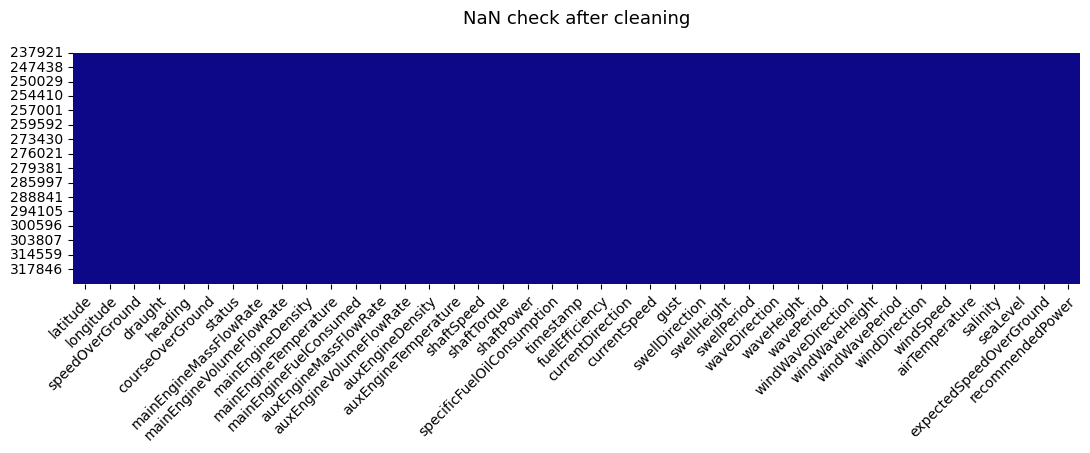

In [13]:
plt.figure(figsize=(df_clean.shape[1] // 3, 3))
sns.heatmap(df_clean.isnull(), cmap='plasma', cbar=False)
plt.title("NaN check after cleaning\n", 
          fontsize=13)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

### Feature Selection 

## TODO: correlation graph to see if multicolinearity is there, poss drop highly correlated ones (eg heading/course over ground)

### Model Selection

### Training and Evaluation